<a href="https://colab.research.google.com/github/shiweijing/Coursera_Capstone/blob/master/happiest_cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Happiest city comparison - Helsinki vs Wellington**

**General introduction:**
the purpose of this project is to analyze the neighborhood clusterings of the northern and southern happiest cities in the world: Helsinki (Finland) and Wellington (New Zealand). 


In [ ]:
import numpy as np
import pandas as pd

import json
import requests
from sklearn.cluster import KMeans

import folium

import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

**1. Data collection and preprocessing**

1.1a Helsinki Sub-districts

GET A Dataframe with helsinki's sub-districts and their coordinates

In [ ]:
hel_neibor=pd.read_html("https://fi.wikipedia.org/wiki/Helsingin_alueellinen_jako")
hel_neibor[1]
df_hel=hel_neibor[1]

df_hel=df_hel['Kaupunginosajako']['Kaupunginosa Osa-alue']
df_hel.head

<bound method NDFrame.head of 0                                        01 Kruununhaka
1                                             02 Kluuvi
2                                    03 Kaartinkaupunki
3                                             04 Kamppi
4                                          05 Punavuori
5                                               06 Eira
6                                         07 Ullanlinna
7                                        08 Katajanokka
8                                        09 Kaivopuisto
9     10 Sörnäinen 101 Vilhonvuori 102 Kalasatama 10...
10    11 Kallio 111 Siltasaari 112 Linjat 113 Torkke...
11                  12 Alppiharju 121 Harju 122 Alppila
12                                         13 Etu-Töölö
13                                        14 Taka-Töölö
14                                          15 Meilahti
15    16 Ruskeasuo 161 Vanha Ruskeasuo 162 Pikku Huo...
16    17 Pasila 171 Länsi-Pasila 172 Pohjois-Pasila ...
17                

In [ ]:
df_hel=df_hel.to_frame()
df_hel.columns=(['NB'])
df_hel=df_hel['NB'].str.split(' ',2,expand=True)
df_hel=df_hel.drop([59])
df_hel=df_hel[1]
df_hel=df_hel.to_frame()
df_hel.columns=(['Neighborhood'])


In [ ]:
df_hel.head()

,Neighborhood
0,Kruununhaka
1,Kluuvi
2,Kaartinkaupunki
3,Kamppi
4,Punavuori


In [ ]:
print('there are ',df_hel.shape[0],' Sub-districts in Helsinki')

there are  59  Sub-districts in Helsinki


In [ ]:
df_hel['Latitude']=np.nan
df_hel['Longitude']=np.nan
df_hel.head()

,Neighborhood,Latitude,Longitude
0,Kruununhaka,NaN,NaN
1,Kluuvi,NaN,NaN
2,Kaartinkaupunki,NaN,NaN
3,Kamppi,NaN,NaN
4,Punavuori,NaN,NaN


In [ ]:
geolocator = Nominatim(user_agent="FI_explorer")

address_hel=df_hel['Neighborhood'].values

for c,v in enumerate(address_hel):
  
  location = geolocator.geocode(v)
  df_hel.loc[[c],['Latitude']] = location.latitude
  df_hel.loc[[c],['Longitude']] = location.longitude


df_hel.head()

,Neighborhood,Latitude,Longitude
0,Kruununhaka,60.172870,24.954733
1,Kluuvi,60.170778,24.947329
2,Kaartinkaupunki,60.165214,24.947222
3,Kamppi,60.168535,24.930494
4,Punavuori,60.161237,24.936505


1.1b Wellington Subdistricts

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

soup = BeautifulSoup(urlopen("https://en.wikipedia.org/wiki/Category:Suburbs_of_Wellington_City"))

wel_nb=[]
for tag in soup.find_all('li'):
  wel_nb.append(tag.text)

wel_nb=wel_nb[1:59]
wel_nb

['Aro Valley',
 'Berhampore, New Zealand',
 'Borough of Onslow',
 'Breaker Bay',
 'Brooklyn, New Zealand',
 'Churton Park',
 'Crofton Downs',
 'Glenside, New Zealand',
 'Grenada North',
 'Grenada, New Zealand',
 'Happy Valley, Wellington',
 'Hataitai',
 'Horokiwi',
 'Houghton Bay',
 'Island Bay, New Zealand',
 'Johnsonville, New Zealand',
 'Kaiwharawhara',
 'Karaka Bays',
 'Karori',
 'Kelburn, New Zealand',
 'Khandallah',
 'Kilbirnie, New Zealand',
 'Kingston, Wellington',
 'Linden, New Zealand',
 'Lyall Bay',
 'Mākara',
 'Mākara Beach',
 'Maupuia',
 'Melrose, New Zealand',
 'Miramar, New Zealand',
 'Mornington, Wellington',
 'Mount Cook, Wellington',
 'Mount Victoria, Wellington',
 'Newlands, Wellington',
 'Newtown, New Zealand',
 'Ngaio, New Zealand',
 'Ngauranga',
 'Northland, Wellington',
 'Ohariu, New Zealand',
 'Oriental Bay',
 'Ōwhiro Bay',
 'Paparangi',
 'Redwood, Wellington',
 'Rongotai',
 'Roseneath, Wellington',
 'Seatoun',
 'Shelly Bay',
 'Strathmore Park',
 'Takapu Valley'

In [ ]:
df_wel=pd.DataFrame(wel_nb, columns=['Neighborhood'])
df_wel['Latitude']=np.nan
df_wel['Longitude']=np.nan
df_wel.head()

,Neighborhood,Latitude,Longitude
0,Aro Valley,NaN,NaN
1,"Berhampore, New Zealand",NaN,NaN
2,Borough of Onslow,NaN,NaN
3,Breaker Bay,NaN,NaN
4,"Brooklyn, New Zealand",NaN,NaN


In [ ]:
geolocator = Nominatim(user_agent="NZ_explorer")

address_wel=df_wel['Neighborhood'].values

for c,v in enumerate(address_wel):
  
  location = geolocator.geocode(v)
  df_wel.loc[[c],['Latitude']] = location.latitude
  df_wel.loc[[c],['Longitude']] = location.longitude


df_wel.head()

,Neighborhood,Latitude,Longitude
0,Aro Valley,-41.295328,174.766580
1,"Berhampore, New Zealand",-41.323264,174.774090
2,Borough of Onslow,55.878469,-132.356588
3,Breaker Bay,-41.334316,174.827818
4,"Brooklyn, New Zealand",-41.306574,174.762354


In [ ]:
df_wel=df_wel[df_wel['Latitude']<-20]
df_wel=df_wel.reset_index(drop=True)

In [ ]:
print('there are ',df_wel.shape[0],' neighborhoods in Wellington')

there are  55  neighborhoods in Wellington


1.2 Venues Exploring

Define foursquare Credentials and Version

In [ ]:
CLIENT_ID = 'XC5WDSHXZRLRS0MALJXUFXLSUL5NFDAHKKAJ2R1X00UCRDYZ' # your Foursquare ID
CLIENT_SECRET = 'VK1UUDGYHC3ZM2RJXRPKWP1D1CQHHILVREWTZWSO3MUX4DNY' # your Foursquare Secret
VERSION = '20200728' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XC5WDSHXZRLRS0MALJXUFXLSUL5NFDAHKKAJ2R1X00UCRDYZ
CLIENT_SECRET:VK1UUDGYHC3ZM2RJXRPKWP1D1CQHHILVREWTZWSO3MUX4DNY


In [ ]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

1.2a Helsinki Venues

In [ ]:
helsinki_venues = getNearbyVenues(names=df_hel['Neighborhood'],
                                   latitudes=df_hel['Latitude'],
                                   longitudes=df_hel['Longitude']
                                  )

In [ ]:
helsinki_venues.shape

(1371, 7)

In [ ]:
helsinki_venues.head()

In [ ]:
helsinki_venues['Venue Category'].nunique()  # unique categories in Helsinki

250

In [ ]:
helsinki_venues.groupby('Neighborhood')['Venue Category'].count()

Neighborhood
Alppiharju                  26
Eira                        34
Etu-Töölö                   36
Haaga                       15
Hermanni                    11
Herttoniemi                 37
Kaarela                      6
Kaartinkaupunki             80
Kaivopuisto                 29
Kallio                      93
Kamppi                      90
Karhusaari                   5
Katajanokka                 35
Kluuvi                      71
Konala                      15
Koskela                     11
Kruununhaka                 60
Kulosaari                   10
Kumpula                      6
Käpylä                      14
Laajasalo                    6
Laakso                       3
Lauttasaari                 31
Länsisatama                 27
Malmi                       24
Meilahti                    22
Mellunkylä                  17
Munkkiniemi                 15
Mustikkamaa–Korkeasaari     13
Oulunkylä                   15
Pakila                       5
Pitäjänmäki               

1.2b Wellington Venues

In [ ]:
wel_venues = getNearbyVenues(names=df_wel['Neighborhood'],
                                   latitudes=df_wel['Latitude'],
                                   longitudes=df_wel['Longitude']
                                  )

In [ ]:
wel_venues.shape

(569, 7)

In [ ]:
wel_venues.head()

In [ ]:
wel_venues['Venue Category'].nunique()  # unique categories in Wellington

158

In [ ]:
wel_venues.groupby('Venue Category')['Neighborhood'].count().reset_index(name='count').sort_values(['count'],ascending=False)

,Venue Category,count
26,Café,56
35,Coffee Shop,28
118,Restaurant,17
52,Fish & Chips Shop,17
109,Pizza Place,16
...,...,...
62,Gift Shop,1
61,German Restaurant,1
60,Gay Bar,1
55,French Restaurant,1


In [ ]:
wel_venues.groupby('Neighborhood')['Venue Category'].count()

Neighborhood
Aro Valley                         13
Berhampore, New Zealand             5
Breaker Bay                         3
Brooklyn, New Zealand               8
Churton Park                        1
Crofton Downs                       3
Glenside, New Zealand               3
Grenada North                       3
Grenada, New Zealand                3
Hataitai                           16
Horokiwi                            1
Houghton Bay                        4
Island Bay, New Zealand             8
Johnsonville, New Zealand           9
Kaiwharawhara                       2
Karaka Bays                         7
Karori                             10
Kelburn, New Zealand               14
Khandallah                          9
Kilbirnie, New Zealand             14
Kingston, Wellington                3
Linden, New Zealand                 4
Lyall Bay                           4
Maupuia                             4
Melrose, New Zealand                4
Miramar, New Zealand               23

1.3 Data Prepocessing

In [ ]:
# one hot encoding
helsinki_onehot = pd.get_dummies(helsinki_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
helsinki_onehot['Neighborhood'] = helsinki_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [helsinki_onehot.columns[-1]] + list(helsinki_onehot.columns[:-1])
helsinki_onehot = helsinki_onehot[fixed_columns]

helsinki_onehot

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Automotive Shop,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Bay,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Blini House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cable Car,Cafeteria,Café,Canal,...,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tattoo Parlor,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Kruununhaka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kruununhaka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kruununhaka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kruununhaka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kruununhaka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,Ultuna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1367,Ultuna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1368,Ultuna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1369,Ultuna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
helsinki_grouped = helsinki_onehot.groupby('Neighborhood').mean().reset_index()

In [ ]:
helsinki_grouped_cluster=helsinki_grouped.drop(columns=['Neighborhood'],axis=1)

In [ ]:
helsinki_grouped_cluster

In [ ]:
# one hot encoding
wel_onehot = pd.get_dummies(wel_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
wel_onehot['Neighborhoods'] = wel_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [wel_onehot.columns[-1]] + list(wel_onehot.columns[:-1])
wel_onehot = wel_onehot[fixed_columns]

wel_onehot

,Neighborhoods,Adult Boutique,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bridge,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Cambodian Restaurant,Camera Store,Cemetery,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,...,Restaurant,River,Road,Rock Club,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Club,Squash Court,Stables,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar
0,Aro Valley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Aro Valley,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Aro Valley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Aro Valley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Aro Valley,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Worser Bay,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565,Worser Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
566,Worser Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
567,Worser Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
wel_grouped = wel_onehot.groupby('Neighborhoods').mean().reset_index()

In [ ]:
wel_grouped_cluster=wel_grouped.drop(columns=['Neighborhoods'],axis=1)

In [ ]:
wel_grouped_cluster

2. Machine Learning Modeling

optimal K

In [ ]:
Sum_of_squared_distances_hel = []
Sum_of_squared_distances_wel = []

K = range(1,15)
for k in K:
    km_hel = KMeans(n_clusters=k,random_state=0).fit(helsinki_grouped_cluster)
    km_wel = KMeans(n_clusters=k,random_state=0).fit(wel_grouped_cluster)
    Sum_of_squared_distances_hel.append(km_hel.inertia_)
    Sum_of_squared_distances_wel.append(km_wel.inertia_)  


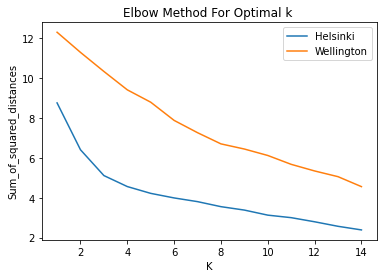

In [ ]:
plt.plot(K, Sum_of_squared_distances_hel, label='Helsinki')
plt.plot(K, Sum_of_squared_distances_wel, label='Wellington')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k ')
plt.legend()
plt.show()

2.1 Clustering - Helsinki

In [ ]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans_hel = KMeans(n_clusters=kclusters, random_state=0).fit(helsinki_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans_hel.labels_[0:10] 

array([3, 3, 3, 0, 3, 3, 0, 3, 3, 3], dtype=int32)

In [ ]:
helsinki_grouped.insert(0,'Cluster Labels',kmeans_hel.labels_)

In [ ]:
helsinki_grouped

In [ ]:
hel_merge=helsinki_grouped.merge(df_hel,on='Neighborhood')

In [ ]:
hel_merge

In [ ]:
lat_hel=60.1699
lng_hel=24.9384

In [ ]:
# create map
map_clusters = folium.Map(location=[lat_hel, lng_hel], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow=['blue','red','green','purple']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hel_merge['Latitude'], hel_merge['Longitude'], hel_merge['Neighborhood'], hel_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1], 
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

2.2 clustering-Wellington

In [ ]:
# set number of clusters
kclusters = 6


# run k-means clustering
kmeans_wel = KMeans(n_clusters=kclusters, random_state=0).fit(wel_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans_wel.labels_[0:10] 

array([1, 1, 5, 1, 2, 3, 3, 1, 1, 1], dtype=int32)

In [ ]:
wel_grouped.insert(0,'Cluster Labels',kmeans_wel.labels_)

In [ ]:
df_wel=df_wel.rename(columns={"Neighborhood": "Neighborhoods"})

In [ ]:
wel_merge=wel_grouped.merge(df_wel,on="Neighborhoods")

In [ ]:
lat_wel=-41.2769
lng_wel=174.7731

In [ ]:
# create map
map_clusters = folium.Map(location=[lat_wel, lng_wel], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wel_merge['Latitude'], wel_merge['Longitude'], wel_merge['Neighborhoods'], wel_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_hel = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_wel = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_hel['Neighborhood'] = helsinki_grouped['Neighborhood']
neighborhoods_venues_sorted_wel['Neighborhood'] = wel_grouped['Neighborhoods']

for ind in np.arange(wel_grouped.shape[0]):
    neighborhoods_venues_sorted_wel.iloc[ind,1:] = return_most_common_venues(wel_grouped.iloc[ind, 2:], num_top_venues)

for ind in np.arange(helsinki_grouped.shape[0]):
    neighborhoods_venues_sorted_hel.iloc[ind,1:] = return_most_common_venues(helsinki_grouped.iloc[ind, 2:], num_top_venues)


In [ ]:
neighborhoods_venues_sorted_hel.head()

In [ ]:
hel_merge_1=neighborhoods_venues_sorted_hel.merge(df_hel,on='Neighborhood')

In [ ]:
hel_merge_1.insert(0,'Cluster Labels',kmeans_hel.labels_)

**Helsinki, cluster 1**

In [ ]:
hel_merge_1.loc[hel_merge_1['Cluster Labels'] == 0, hel_merge_1.columns[[0,1] + list(range(2, hel_merge_1.shape[1]))]]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
3,0,Haaga,Bus Stop,Park,Platform,Café,Supermarket,Sushi Restaurant,Grocery Store,Soccer Field,Recreation Center,Garden,60.218426,24.897974
6,0,Kaarela,Garden,Stables,Bus Stop,Dance Studio,Park,Flea Market,Gastropub,Furniture / Home Store,French Restaurant,Fraternity House,60.251866,24.873085
11,0,Karhusaari,Bus Stop,Boat or Ferry,Park,Lounge,Flower Shop,Gay Bar,Gastropub,Garden,Furniture / Home Store,French Restaurant,60.251043,25.223406
15,0,Koskela,Bus Stop,Playground,Pizza Place,Café,Go Kart Track,Scenic Lookout,Soccer Field,Grocery Store,Food & Drink Shop,Food Court,60.218765,24.968244
17,0,Kulosaari,Bus Stop,Tennis Court,Park,Grocery Store,Harbor / Marina,Chinese Restaurant,Recreation Center,Dog Run,Event Space,Exhibit,60.185388,25.009685
18,0,Kumpula,Park,Bus Stop,Supermarket,Garden,Botanical Garden,Zoo Exhibit,Flower Shop,Gastropub,Furniture / Home Store,French Restaurant,60.204001,24.958108
19,0,Käpylä,Bus Stop,Grocery Store,Convenience Store,Café,Gym Pool,Flower Shop,Coffee Shop,Scenic Lookout,Scandinavian Restaurant,Pharmacy,60.215684,24.952786
21,0,Laakso,Italian Restaurant,Bus Stop,Gastropub,Flea Market,Gay Bar,Garden,Furniture / Home Store,French Restaurant,Fraternity House,Fountain,60.194086,24.919167
29,0,Oulunkylä,Bus Stop,Pizza Place,Park,Recreation Center,Knitting Store,Gym,Grocery Store,Sandwich Place,Café,Irish Pub,60.229443,24.963583
32,0,Pukinmäki,Bus Stop,Recreation Center,Playground,Dive Bar,Grocery Store,Coffee Shop,Pet Store,Beer Bar,Concert Hall,Himalayan Restaurant,60.245247,24.989694


**Helsinki, cluster 2**

In [ ]:
hel_merge_1.loc[hel_merge_1['Cluster Labels'] == 1, hel_merge_1.columns[[0,1] + list(range(2, hel_merge_1.shape[1]))]]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
42,1,Talosaari,Stables,Zoo Exhibit,Fish Market,Gay Bar,Gastropub,Garden,Furniture / Home Store,French Restaurant,Fraternity House,Fountain,60.243624,25.201558
46,1,Tuomarinkylä,Stables,Restaurant,Brewery,Furniture / Home Store,Farm,Forest,Flower Shop,Food & Drink Shop,Food Court,Food Stand,60.257281,24.968016
56,1,Östersundom,Stables,Hobby Shop,Forest,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Zoo Exhibit,Fish Market,60.259604,25.187008


**Helsinki, cluster 3**

In [ ]:
hel_merge_1.loc[hel_merge_1['Cluster Labels'] == 2, hel_merge_1.columns[[0,1] + list(range(2, hel_merge_1.shape[1]))]]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
20,2,Laajasalo,Bus Stop,Playground,Park,Flower Shop,Zoo Exhibit,Fish Market,Garden,Furniture / Home Store,French Restaurant,Fraternity House,60.173205,25.044920
30,2,Pakila,Bus Stop,Zoo Exhibit,Flea Market,Gay Bar,Gastropub,Garden,Furniture / Home Store,French Restaurant,Fraternity House,Fountain,60.243545,24.939963
35,2,Salmenkallio,Bus Stop,Zoo Exhibit,Flea Market,Gay Bar,Gastropub,Garden,Furniture / Home Store,French Restaurant,Fraternity House,Fountain,60.244024,25.157407
38,2,Suurmetsä,Bus Stop,Recreation Center,Flower Shop,German Restaurant,Gay Bar,Gastropub,Garden,Furniture / Home Store,French Restaurant,Fraternity House,60.267585,25.061563
44,2,Tapaninkylä,Bus Stop,Gourmet Shop,Park,Zoo Exhibit,German Restaurant,Gastropub,Garden,Furniture / Home Store,French Restaurant,Fraternity House,60.261178,25.010985
48,2,Ultuna,Bus Stop,Soccer Field,Park,Zoo Exhibit,Flea Market,Garden,Furniture / Home Store,French Restaurant,Fraternity House,Fountain,60.271367,25.202134
53,2,Viikki,Bus Stop,Italian Restaurant,Eye Doctor,Recreation Center,Donut Shop,Dumpling Restaurant,Gay Bar,Dive Bar,Gastropub,Garden,60.225892,25.022264


**Helsinki, cluster 4**

In [ ]:
hel_merge_1.loc[hel_merge_1['Cluster Labels'] == 3, hel_merge_1.columns[[0,1] + list(range(2, hel_merge_1.shape[1]))]]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,3,Alppiharju,Theme Park Ride / Attraction,Park,Greek Restaurant,Theme Park,History Museum,Soccer Field,Gym,Steakhouse,Sushi Restaurant,Blini House,60.189728,24.944120
1,3,Eira,Ice Cream Shop,Park,Boat or Ferry,Bakery,Italian Restaurant,French Restaurant,Café,Indie Theater,Modern European Restaurant,Harbor / Marina,60.156191,24.938375
2,3,Etu-Töölö,Scandinavian Restaurant,Plaza,Pub,Park,Restaurant,Sushi Restaurant,Coffee Shop,Bakery,Café,Gym,60.174031,24.922303
4,3,Hermanni,Sports Bar,Tram Station,Sporting Goods Shop,Gym,Park,Hill,Bar,Sauna / Steam Room,Bus Stop,Yoga Studio,60.196624,24.970935
5,3,Herttoniemi,Bus Stop,Gym / Fitness Center,Supermarket,Sandwich Place,Chinese Restaurant,Pharmacy,Discount Store,Post Office,Electronics Store,Buffet,60.195525,25.029063
7,3,Kaartinkaupunki,Scandinavian Restaurant,Hotel,Coffee Shop,Café,Cocktail Bar,Park,Bar,Sushi Restaurant,Restaurant,Pizza Place,60.165214,24.947222
8,3,Kaivopuisto,Grocery Store,Park,Coffee Shop,Ice Cream Shop,Spanish Restaurant,Café,Nature Preserve,Nightclub,Scandinavian Restaurant,Monument / Landmark,60.156465,24.955262
9,3,Kallio,Bar,Bakery,Park,Café,Grocery Store,Thai Restaurant,Beer Bar,Pizza Place,Scandinavian Restaurant,Thrift / Vintage Store,60.183982,24.952451
10,3,Kamppi,Pizza Place,Wine Bar,Beer Bar,Scandinavian Restaurant,Art Museum,Gym / Fitness Center,Bar,Toy / Game Store,Burger Joint,Japanese Restaurant,60.168535,24.930494
12,3,Katajanokka,Park,Scandinavian Restaurant,Boat or Ferry,Hotel,Bar,Restaurant,Piano Bar,Grocery Store,Gym / Fitness Center,Construction & Landscaping,60.166975,24.968151


In [ ]:
neighborhoods_venues_sorted_wel.head()

In [ ]:
df_wel.head()

In [ ]:
df_wel=df_wel.rename({"Neighborhoods":"Neighborhood"},axis=1)

In [ ]:
wel_merge_1=neighborhoods_venues_sorted_wel.merge(df_wel,on='Neighborhood')

In [ ]:
wel_merge_1.insert(0,'Cluster Labels',kmeans_wel.labels_)

**Wellington cluster 1**

In [ ]:
wel_merge_1.loc[wel_merge_1['Cluster Labels'] == 0, wel_merge_1.columns[[0,1] + list(range(2, wel_merge_1.shape[1]))]]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
32,0,Ngauranga,Furniture / Home Store,Electronics Store,Wine Bar,Farmers Market,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,-41.241515,174.815286


**Wellington cluster 2**

In [ ]:
wel_merge_1.loc[wel_merge_1['Cluster Labels'] == 1, wel_merge_1.columns[[0,1] + list(range(2, wel_merge_1.shape[1]))]]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,1,Aro Valley,Bakery,Italian Restaurant,Nature Preserve,Brewery,Fish Market,Park,Grocery Store,Beer Bar,Hotel,Liquor Store,-41.295328,174.766580
1,1,"Berhampore, New Zealand",Park,Fast Food Restaurant,Martial Arts School,Modern European Restaurant,Wine Bar,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,-41.323264,174.774090
3,1,"Brooklyn, New Zealand",Pie Shop,Convenience Store,Gastropub,Café,Fast Food Restaurant,Burger Joint,Video Store,Indie Movie Theater,Dog Run,Dumpling Restaurant,-41.306574,174.762354
7,1,Grenada North,Cricket Ground,Paintball Field,Park,Garden,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,-41.186205,174.837951
8,1,"Grenada, New Zealand",Cricket Ground,Paintball Field,Park,Garden,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,-41.186205,174.837951
9,1,Hataitai,Café,Burger Joint,Grocery Store,Bar,Fish & Chips Shop,Park,Tennis Court,Beach,Thai Restaurant,Japanese Restaurant,-41.304278,174.796780
13,1,"Johnsonville, New Zealand",Fast Food Restaurant,Supermarket,Café,Train Station,Toy / Game Store,Mobile Phone Shop,Men's Store,Wine Bar,French Restaurant,Food Truck,-41.220339,174.802761
15,1,Karaka Bays,Gym,Café,Pizza Place,Home Service,Big Box Store,Filipino Restaurant,Fast Food Restaurant,Wine Bar,French Restaurant,Food Truck,-36.881474,174.856176
16,1,Karori,Café,Gastropub,Indian Restaurant,Asian Restaurant,Pool,Liquor Store,Plaza,Thai Restaurant,Grocery Store,Farmers Market,-41.284109,174.746052
17,1,"Kelburn, New Zealand",Café,Indian Restaurant,Malay Restaurant,Pub,Bus Stop,Sushi Restaurant,Sandwich Place,Grocery Store,Bakery,Coffee Shop,-41.289205,174.762393


**Wellington cluster 3**

In [ ]:
wel_merge_1.loc[wel_merge_1['Cluster Labels'] == 2, wel_merge_1.columns[[0,1] + list(range(2, wel_merge_1.shape[1]))]]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
4,2,Churton Park,Cosmetics Shop,Farmers Market,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,-41.208938,174.807138


**Wellington cluster 4**

In [ ]:
wel_merge_1.loc[wel_merge_1['Cluster Labels'] == 3, wel_merge_1.columns[[0,1] + list(range(2, wel_merge_1.shape[1]))]]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
5,3,Crofton Downs,Supermarket,Café,Train Station,Wine Bar,Farmers Market,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,-41.257526,174.762437
6,3,"Glenside, New Zealand",Dog Run,Café,Garden Center,Wine Bar,Filipino Restaurant,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,-41.206097,174.812459
12,3,"Island Bay, New Zealand",Café,Fast Food Restaurant,Video Store,Supermarket,Pizza Place,Skate Park,Beer Garden,Wine Bar,Food Truck,Fish Market,-41.332314,174.771652
14,3,Kaiwharawhara,Supermarket,Café,Wine Bar,Garden Center,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,-41.260346,174.767580
18,3,Khandallah,Café,Pub,Asian Restaurant,Convenience Store,Supermarket,Pizza Place,Train Station,Farmers Market,Food Truck,Fish Market,-41.246742,174.790589
22,3,Lyall Bay,Café,Brewery,Fish & Chips Shop,Cricket Ground,Garden,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Filipino Restaurant,-41.323407,174.798482
29,3,Mākara Beach,Beach,Café,Garden Center,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,-41.219865,174.713816
34,3,"Ohariu, New Zealand",Stables,Café,Cricket Ground,Garden,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,-41.209674,174.773827
35,3,Oriental Bay,Café,Ice Cream Shop,Beach,Pool,Restaurant,Convenience Store,Playground,Mountain,Tapas Restaurant,Wine Bar,-41.291835,174.793919


**Wellington cluster 5**

In [ ]:
wel_merge_1.loc[wel_merge_1['Cluster Labels'] == 4, wel_merge_1.columns[[0,1] + list(range(2, wel_merge_1.shape[1]))]]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
10,4,Horokiwi,River,Wine Bar,Farmers Market,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,-41.200949,174.845982


**Wellington cluster 6**

In [ ]:
wel_merge_1.loc[wel_merge_1['Cluster Labels'] == 5, wel_merge_1.columns[[0,1] + list(range(2, wel_merge_1.shape[1]))]]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
2,5,Breaker Bay,Beach,Nudist Beach,Playground,Farmers Market,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,-41.334316,174.827818
11,5,Houghton Bay,Nature Preserve,Playground,Park,Beach,Dumpling Restaurant,Electronics Store,Dog Run,Exhibit,Falafel Restaurant,Farmers Market,-41.338233,174.787822
23,5,Maupuia,Scenic Lookout,Beach,Soccer Field,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,-41.302141,174.820241
39,5,"Roseneath, Wellington",Beach,Scenic Lookout,Playground,Monument / Landmark,Bay,Seafood Restaurant,Wine Bar,Food Truck,Fish Market,Fish & Chips Shop,-41.293697,174.801459
49,5,"Woodridge, New Zealand",Playground,Wine Bar,Farmers Market,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,-41.216469,174.832599
50,5,Worser Bay,Bed & Breakfast,Pier,Scenic Lookout,Beach,Harbor / Marina,Sports Club,Electronics Store,Fast Food Restaurant,Furniture / Home Store,French Restaurant,-41.315796,174.829990
51,5,Ōwhiro Bay,Playground,Tree,Neighborhood,Wine Bar,Fast Food Restaurant,Furniture / Home Store,French Restaurant,Food Truck,Fish Market,Fish & Chips Shop,-41.340756,174.759121
